<a href="https://colab.research.google.com/github/EdAkh/DNN_Energy_Efficiency_Model/blob/main/Energy_efficiency_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy Efficiency Data Set

## Introduction

**Source:**
The dataset was created by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

**Data Set Information:**
We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.

**Attribute Information:**
The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
- X1 Relative Compactness
- X2 Surface Area
- X3 Wall Area
- X4 Roof Area
- X5 Overall Height
- X6 Orientation
- X7 Glazing Area
- X8 Glazing Area Distribution
- y1 Heating Load
- y2 Cooling Load

## Libraries importation

In [ ]:
#importing libraries
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

## Data Collection

### Loading data

In [ ]:
#Load the data set from UCI
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"

#Read the excel file and import it
data = pd.read_excel(URL)

#Display the dataframe "data"
data

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
#Searching missing values
data.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [ ]:
#Statistical description of the values
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [ ]:
#Changing the columns names
data.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution', 'Heating Load', 'Cooling Load']
data

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
X = data.iloc[:, :-2]
y1 = data.iloc[:, 8]
y2 = data.iloc[:, 9]

### Features histograms

<Figure size 640x480 with 0 Axes>

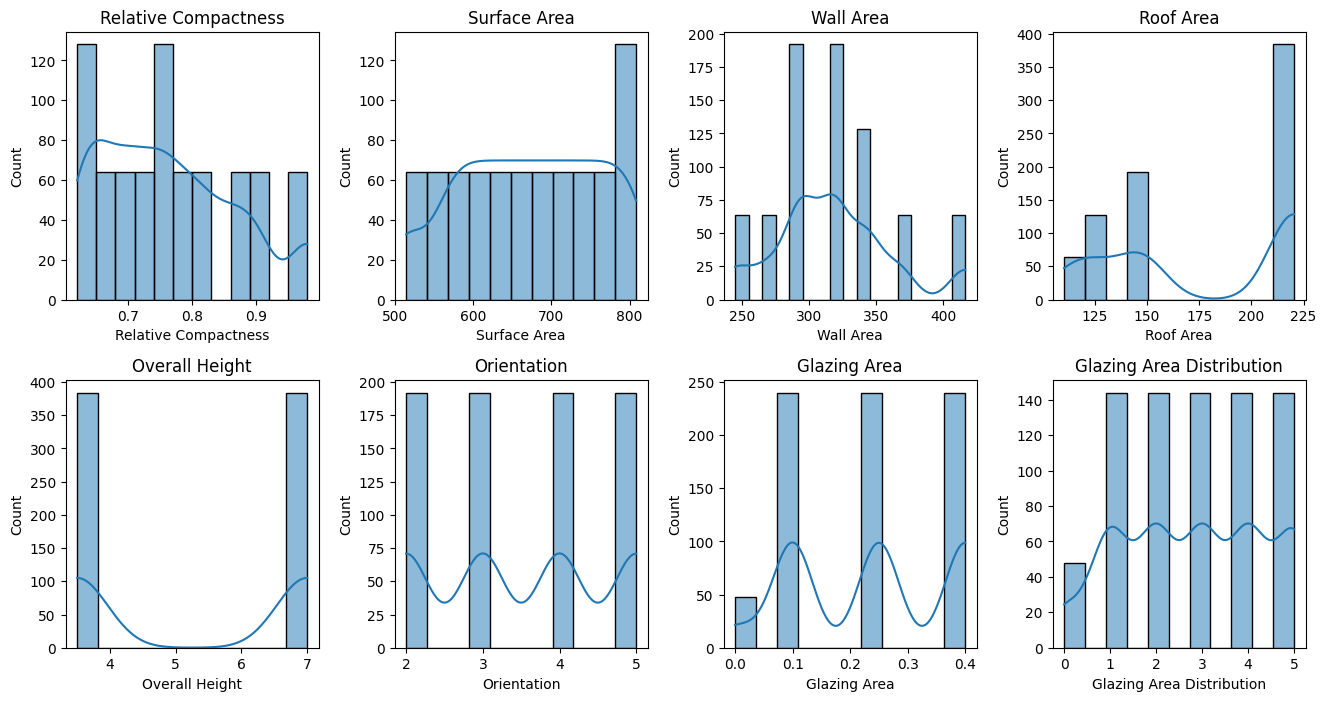

<Figure size 640x480 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

axes = axes.flatten()

for i, column in enumerate(X.columns):
    sns.histplot(X[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.figure()

### Responses histograms

<ipython-input-8-e362782bff34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y1, kde=True, color="red", hist_kws=dict(edgecolor="white"))


<Axes: xlabel='Heating Load', ylabel='Density'>

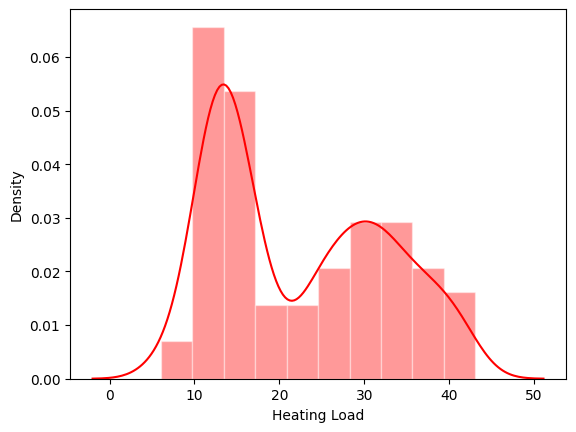

In [ ]:
sns.distplot(y1, kde=True, color="red", hist_kws=dict(edgecolor="white"))

<ipython-input-9-5cb4c5f4ebec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y2, kde=True, color="blue", hist_kws=dict(edgecolor="white"))


<Axes: xlabel='Cooling Load', ylabel='Density'>

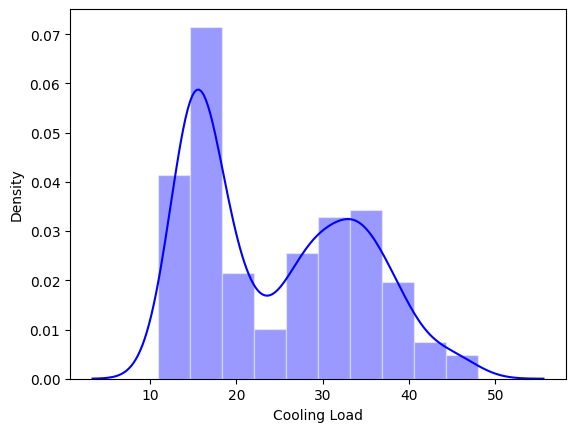

In [ ]:
sns.distplot(y2, kde=True, color="blue", hist_kws=dict(edgecolor="white"))

## Data Preparation

### Data standardization

In [ ]:
#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 2.04177671, -1.78587489, -0.56195149, ..., -1.34164079,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ..., -0.4472136 ,
        -1.76044698, -1.81457514],
       [ 2.04177671, -1.78587489, -0.56195149, ...,  0.4472136 ,
        -1.76044698, -1.81457514],
       ...,
       [-1.36381225,  1.55394308,  1.12390297, ..., -0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  0.4472136 ,
         1.2440492 ,  1.41133622],
       [-1.36381225,  1.55394308,  1.12390297, ...,  1.34164079,
         1.2440492 ,  1.41133622]])

### Data splitting

In [ ]:
#Spliting the features and targets into training and test data
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X_scaled, y1, y2, test_size=0.2, random_state=42)

## Model

### Model definition

In [ ]:
#Define a sequential model with 8 inputs and 3 layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(8))),
model.add(tf.keras.layers.Dense(units=256, activation='relu')),
model.add(tf.keras.layers.Dense(units=256, activation='relu')),
model.add(tf.keras.layers.Dense(units=1, activation='linear')),

#Display the content the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2304      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,353
Trainable params: 68,353
Non-trainable params: 0
_________________________________________________________________


### Model configuration

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

### Model training

In [ ]:
#Train the model for the first target
history1 = model.fit(X_train, y1_train, epochs=500, batch_size=8, validation_split=0.2, validation_data=(X_test, y1_test))

Epoch 1/500
77/77 [==============================] - 5s 21ms/step - loss: 180.9684 - mean_squared_error: 180.9684 - mean_absolute_error: 9.2168 - val_loss: 31.7943 - val_mean_squared_error: 31.7943 - val_mean_absolute_error: 3.9837
Epoch 2/500
77/77 [==============================] - 1s 11ms/step - loss: 23.8925 - mean_squared_error: 23.8925 - mean_absolute_error: 3.5023 - val_loss: 23.1354 - val_mean_squared_error: 23.1354 - val_mean_absolute_error: 3.5958
Epoch 3/500
77/77 [==============================] - 1s 11ms/step - loss: 17.4292 - mean_squared_error: 17.4292 - mean_absolute_error: 3.0462 - val_loss: 15.6492 - val_mean_squared_error: 15.6492 - val_mean_absolute_error: 2.7871
Epoch 4/500
77/77 [==============================] - 1s 9ms/step - loss: 12.2267 - mean_squared_error: 12.2267 - mean_absolute_error: 2.5488 - val_loss: 11.7724 - val_mean_squared_error: 11.7724 - val_mean_absolute_error: 2.4920
Epoch 5/500
77/77 [==============================] - 1s 8ms/step - loss: 10.242

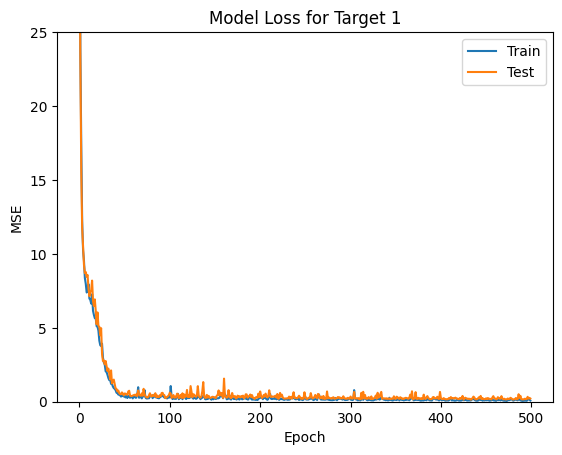

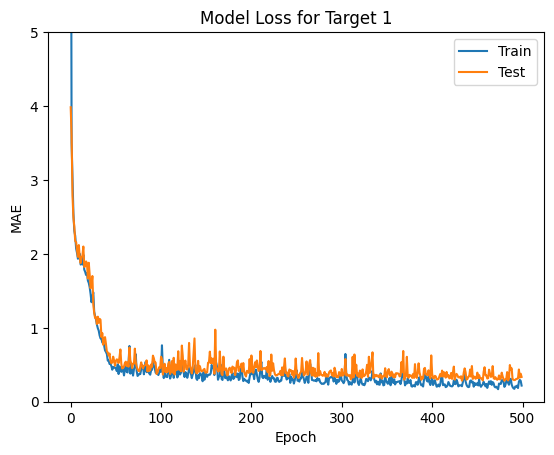

In [ ]:
#Display the loss of MSE for target 1
plt.plot(history1.history['mean_squared_error'])
plt.plot(history1.history['val_mean_squared_error'])
plt.title('Model Loss for Target 1')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.ylim([0,25])
plt.show()

#Display the loss of MAE for target 1
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Model Loss for Target 1')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.ylim([0,5])
plt.show()


In [ ]:
#Train the model for the second model
history2 = model.fit(X_train, y2_train, epochs=500, batch_size=8, validation_split=0.2, validation_data=(X_test, y2_test))

Epoch 1/500
77/77 [==============================] - 1s 6ms/step - loss: 7.8587 - mean_squared_error: 7.8587 - mean_absolute_error: 2.0971 - val_loss: 7.9299 - val_mean_squared_error: 7.9299 - val_mean_absolute_error: 1.9812
Epoch 2/500
77/77 [==============================] - 0s 5ms/step - loss: 4.1119 - mean_squared_error: 4.1119 - mean_absolute_error: 1.4196 - val_loss: 3.3686 - val_mean_squared_error: 3.3686 - val_mean_absolute_error: 1.3221
Epoch 3/500
77/77 [==============================] - 0s 4ms/step - loss: 3.0988 - mean_squared_error: 3.0988 - mean_absolute_error: 1.2156 - val_loss: 3.2690 - val_mean_squared_error: 3.2690 - val_mean_absolute_error: 1.2893
Epoch 4/500
77/77 [==============================] - 0s 5ms/step - loss: 2.6195 - mean_squared_error: 2.6195 - mean_absolute_error: 1.0480 - val_loss: 3.4593 - val_mean_squared_error: 3.4593 - val_mean_absolute_error: 1.2048
Epoch 5/500
77/77 [==============================] - 0s 4ms/step - loss: 2.3780 - mean_squared_error

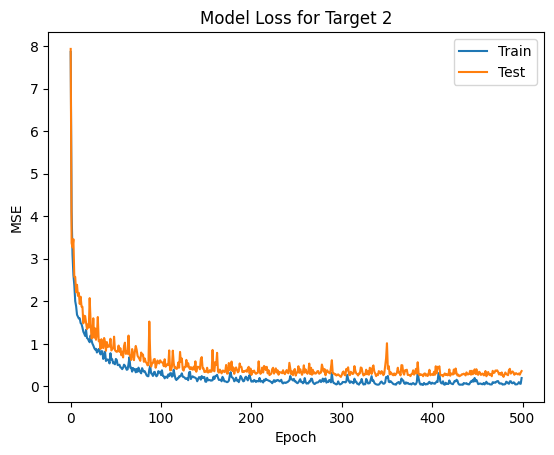

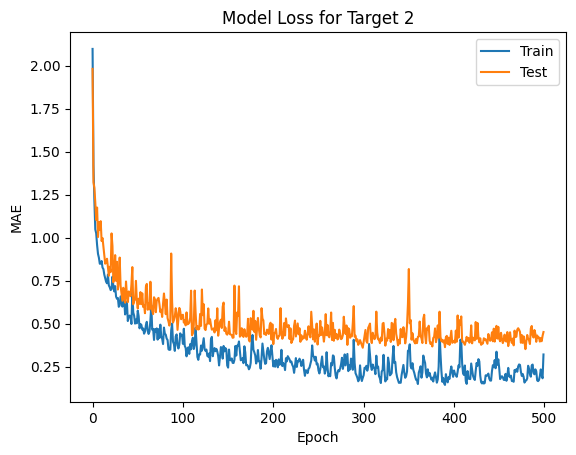

In [ ]:
#Display the loss of MSE for target 2
plt.plot(history2.history['mean_squared_error'])
plt.plot(history2.history['val_mean_squared_error'])
plt.title('Model Loss for Target 2')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Display the loss of MAE for target 2
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Model Loss for Target 2')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Epoch 1/500
16/16 [==============================] - 0s 12ms/step - loss: 4.3761 - mean_squared_error: 4.3761 - mean_absolute_error: 1.6153 - val_loss: 1.8904 - val_mean_squared_error: 1.8904 - val_mean_absolute_error: 1.0863
Epoch 2/500
16/16 [==============================] - 0s 8ms/step - loss: 1.4906 - mean_squared_error: 1.4906 - mean_absolute_error: 0.8733 - val_loss: 0.9529 - val_mean_squared_error: 0.9529 - val_mean_absolute_error: 0.7467
Epoch 3/500
16/16 [==============================] - 0s 6ms/step - loss: 0.9296 - mean_squared_error: 0.9296 - mean_absolute_error: 0.7224 - val_loss: 0.7081 - val_mean_squared_error: 0.7081 - val_mean_absolute_error: 0.6187
Epoch 4/500
16/16 [==============================] - 0s 8ms/step - loss: 0.5593 - mean_squared_error: 0.5593 - mean_absolute_error: 0.5588 - val_loss: 0.5609 - val_mean_squared_error: 0.5609 - val_mean_absolute_error: 0.5611
Epoch 5/500
16/16 [==============================] - 0s 8ms/step - loss: 0.4015 - mean_squared_erro

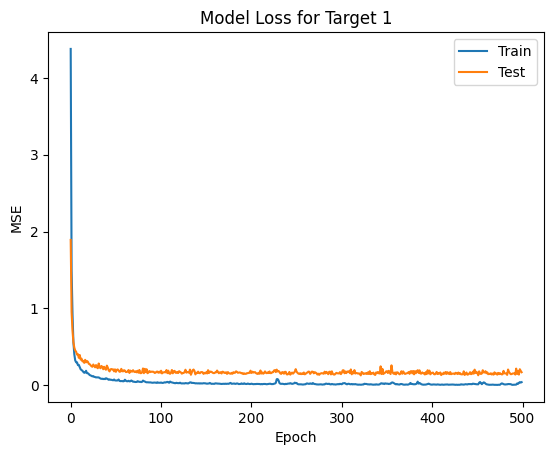

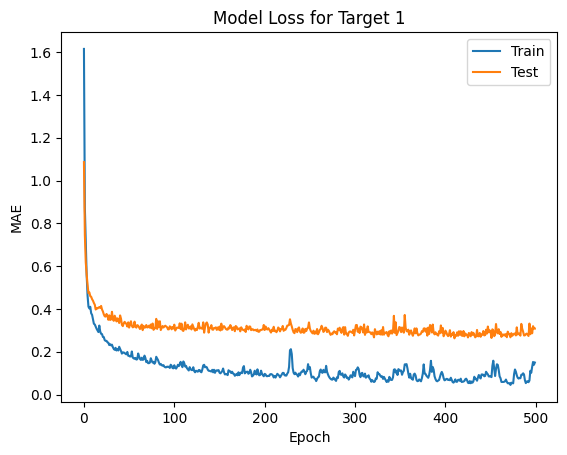

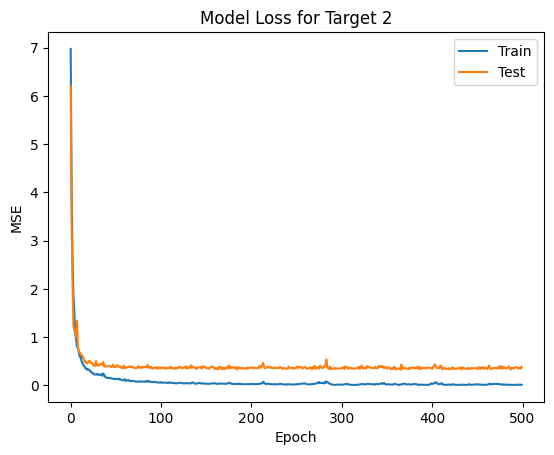

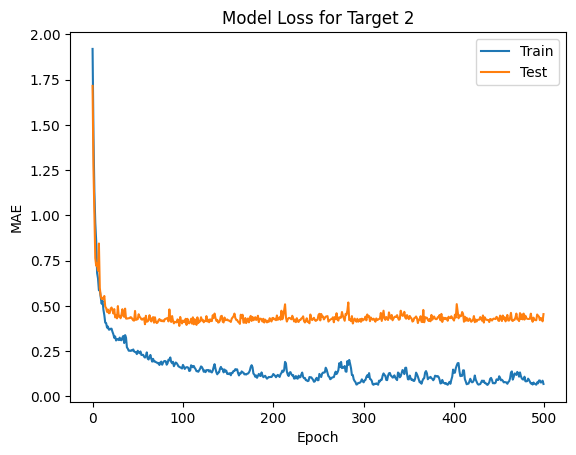

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history1 = model.fit(X_train, y1_train, epochs=500, validation_split=0.2)
history2 = model.fit(X_train, y2_train, epochs=500, validation_split=0.2)

#Display the loss of MSE for target 1
plt.plot(history1.history['mean_squared_error'])
plt.plot(history1.history['val_mean_squared_error'])
plt.title('Model Loss for Target 1')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Display the loss of MAE for target 1
plt.plot(history1.history['mean_absolute_error'])
plt.plot(history1.history['val_mean_absolute_error'])
plt.title('Model Loss for Target 1')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Display the loss of MSE for target 2
plt.plot(history2.history['mean_squared_error'])
plt.plot(history2.history['val_mean_squared_error'])
plt.title('Model Loss for Target 2')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

#Display the loss of MAE for target 2
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Model Loss for Target 2')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

## Results

5/5 [==============================] - 0s 7ms/step - loss: 0.4711 - mean_squared_error: 0.4711 - mean_absolute_error: 0.4775
Test loss for target variable 1:  [10.71135425567627, 10.71135425567627, 2.7380807399749756]
Test loss for target variable 2:  [0.4710504114627838, 0.4710504114627838, 0.4774685204029083]


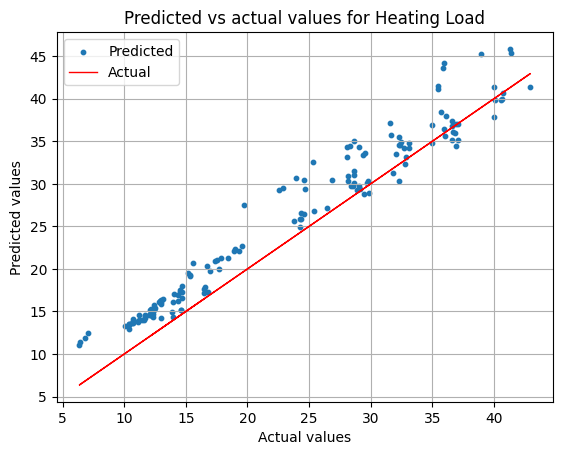

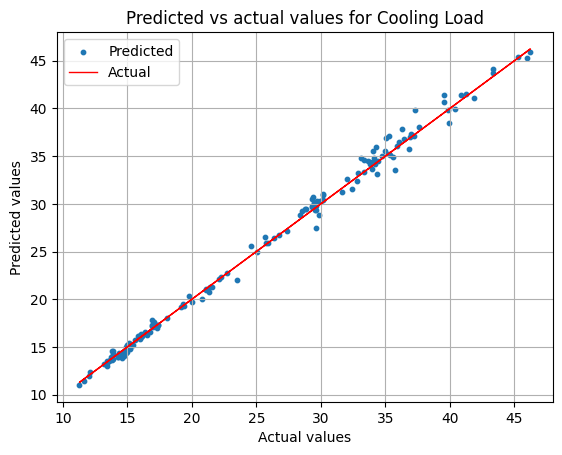

In [ ]:
#Make predictions for y1
y1_pred = model.predict(X_test)

#Make predictions for y2
y2_pred = model.predict(X_test)

y1_pred = y1_pred.flatten()
y2_pred = y2_pred.flatten()

#Evaluate model performance on test data
test_loss1 = model.evaluate(X_test, y1_test)
test_loss2 = model.evaluate(X_test, y2_test)

#Print test loss for each target variable
print("Test loss for target variable 1: ", test_loss1)
print("Test loss for target variable 2: ", test_loss2)

#Plot predicted vs actual values for y1
plt.scatter(y1_test, y1_pred, s=10)
plt.plot(y1_test, y1_test, color='red', linewidth=1)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs actual values for Heating Load")
plt.legend(['Predicted', 'Actual'])
plt.grid(True)
plt.show()

#Plot predicted vs actual values for y2
plt.scatter(y2_test, y2_pred, s=10)
plt.plot(y2_test, y2_test, color='red', linewidth=1)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs actual values for Cooling Load")
plt.legend(['Predicted', 'Actual'])
plt.grid(True)
plt.show()

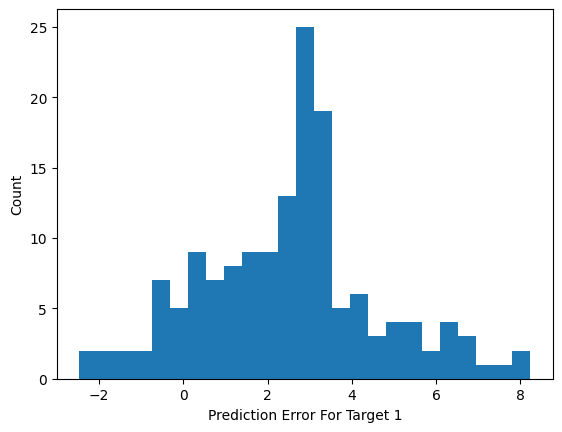

Text(0, 0.5, 'Count')

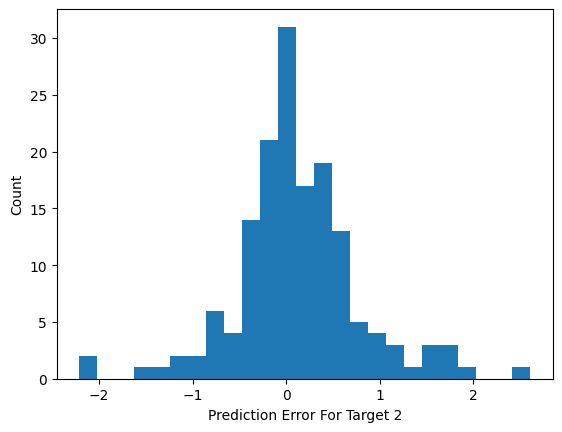

In [ ]:
error = y1_pred - y1_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error For Target 1")
plt.ylabel("Count")
plt.show()

error = y2_pred - y2_test
plt.hist(error, bins=25)
plt.xlabel("Prediction Error For Target 2")
plt.ylabel("Count")

In [25]:
model.save("EE_model.h5")